> ## Formulación del problema.

#### Este dataset contiene información de clientes que compran ropa online. La tienda ofrece sesiones de asesoramiento de estilo y ropa en la tienda. Los clientes van a la tienda, tienen sesiones/reuniones con un estilista personal y luego pueden irse a su casa y hacer pedidos en la aplicación móvil o en el sitio web para la ropa que desean.

#### La compañía está tratando de decidir si enfocar sus esfuerzos en la experiencia de su aplicación móvil o en su sitio web.

> ## Recolección de datos.

#### Link: https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


> ## Exploración de datos.

In [2]:
data = pd.read_csv("/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.shape

(500, 8)

In [4]:
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [5]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Descripción dataset
* #### Contiene 8 columnas/variables/atributos y 500 filas/observaciones.
* #### 3 variables son categóricas y 5 son numéricas incluyendo la variable dependiente/objetivo.
* #### No tiene valores nulos ni filas duplicadas.

> ## Preprocesado de datos.
* #### Eliminaré las columnas "Email","Avatar" y "Address" del dataset para el modelo de regresión lineal.

In [8]:
data_cp = data.copy()
data_cp.drop(["Email","Avatar","Address"], axis=1, inplace=True)
data_cp.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


> ## Construcción del modelo

* ### Correlación de las variables independientes con la variable dependiente.

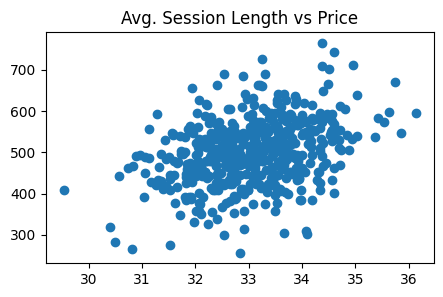

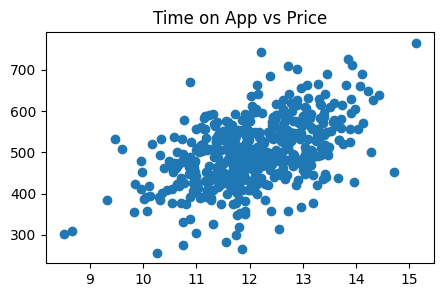

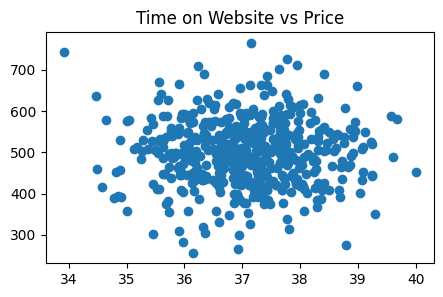

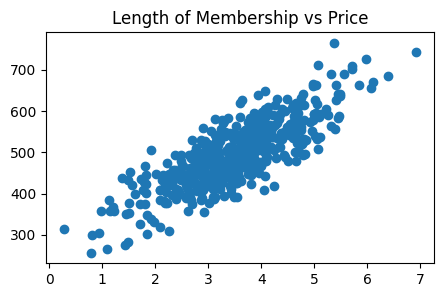

In [9]:
import matplotlib.pyplot as plt

for col in data_cp.columns.drop("Yearly Amount Spent"):
    plt.figure(figsize=(5,3))
    
    plt.scatter(data[col], data["Yearly Amount Spent"])
    plt.title(col+" vs Price")
    
    plt.show()

In [10]:
data_cp.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


* #### Observando los datos puedo comentar que la variable que mayor correlación tiene con la variable dependiente es la variable "Length of Membership". Sin embargo las variables "Avg. Session Length" y "Time on App" tienen un buen grado de correlación con la variable dependiente. La variable "Time on Website" tiene un indice negativo casi cero, por lo que intuyo que lo mejor sería invertir más en la aplicación que en el sitio web.
* #### Con estos datos no observo un alto grado de multicolinealidad entre variables independientes. De igual manera Realizaré un chequeo más exhaustivo de multicolinealidad.

* ### Chequear las multicolinealidades

In [11]:
X = data_cp.drop(["Yearly Amount Spent"], axis=1)
Y = data_cp["Yearly Amount Spent"]

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,feature,VIF
0,Avg. Session Length,613.185924
1,Time on App,144.019714
2,Time on Website,658.495572
3,Length of Membership,13.578801


* #### De acuerdo a este análisis la variable "Length of Membership" tiene el menor grado de multicolinealidad con otras variables, al contrario de la variable "Time on Website" que es la que tiene mayor grado.

* ### Selección de rasgos

In [13]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR  

In [14]:
from IPython.display import display

for n in range(1,len(X.columns.values)):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(X,Y)
    
    selector_df = pd.DataFrame(list(zip(X.columns, selector.support_, selector.ranking_)), columns=["columns", "support", "ranking"])
    
    display(selector_df)

,columns,support,ranking
0,Avg. Session Length,False,3
1,Time on App,False,2
2,Time on Website,False,4
3,Length of Membership,True,1


,columns,support,ranking
0,Avg. Session Length,False,2
1,Time on App,True,1
2,Time on Website,False,3
3,Length of Membership,True,1


,columns,support,ranking
0,Avg. Session Length,True,1
1,Time on App,True,1
2,Time on Website,False,2
3,Length of Membership,True,1


* #### Podemos observar que en caso de querer mejorar el modelo de regresión lineal podemos empezar por quitar del modelo a la variable "Time on Website".

### Separo los datos en datos de entrenamiento y en datos de prueba para el modelo.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X, Y,
                                            test_size=0.3,
                                            random_state=0)

### Realizaré una validación cruzada por k-fold.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [18]:
scores = cross_val_score(LinearRegression(),
                        X, Y,
                        cv=10)
scores.mean()

0.9825492707486994

* #### La validación cruzada da un score de 98%.

> ## Construcción del modelo

In [19]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.score(x_test, y_test)

0.9849262667370623

In [21]:
predict_vs_actual_df = pd.DataFrame(list(zip(lr.predict(x_test), y_test)), columns=["Predict", "Actual"])
predict_vs_actual_df

,Predict,Actual
0,438.053618,449.070319
1,489.885692,482.602467
2,370.691035,374.269675
3,514.760391,513.153112
4,496.718922,502.771075
...,...,...
145,591.820087,599.406092
146,573.233331,564.790969
147,524.023929,533.040060
148,395.157380,409.070472


> ### Construcción del modelo con menos variables para corroborar cual es mejor modelo.

In [22]:
for n in range(1,len(X.columns.values)):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n, step=1)
    selector = selector.fit(X,Y)
    
    selector_df = pd.DataFrame(list(zip(X.columns, selector.support_, selector.ranking_)))
    
    display(selector_df)
    print()
    
    X_new = X[selector_df[selector_df[1]==True][0]]
    
    display(X_new.head())
    
    x_train,x_test,y_train,y_test = train_test_split(X_new, Y,
                                            test_size=0.3,
                                            random_state=0)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    print("Porcentaje de que tan bien se ajustan los datos de la predicción a los valores reales: ",lr.score(x_test, y_test)*100,"%")
    
    print("-"*70)

,0,1,2
0,Avg. Session Length,False,3
1,Time on App,False,2
2,Time on Website,False,4
3,Length of Membership,True,1


,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308


Porcentaje de que tan bien se ajustan los datos de la predicción a los valores reales:  59.83019543807417 %
----------------------------------------------------------------------


,0,1,2
0,Avg. Session Length,False,2
1,Time on App,True,1
2,Time on Website,False,3
3,Length of Membership,True,1


,Time on App,Length of Membership
0,12.655651,4.082621
1,11.109461,2.664034
2,11.330278,4.104543
3,13.717514,3.120179
4,12.795189,4.446308


Porcentaje de que tan bien se ajustan los datos de la predicción a los valores reales:  85.19067019295848 %
----------------------------------------------------------------------


,0,1,2
0,Avg. Session Length,True,1
1,Time on App,True,1
2,Time on Website,False,2
3,Length of Membership,True,1


,Avg. Session Length,Time on App,Length of Membership
0,34.497268,12.655651,4.082621
1,31.926272,11.109461,2.664034
2,33.000915,11.330278,4.104543
3,34.305557,13.717514,3.120179
4,33.330673,12.795189,4.446308


Porcentaje de que tan bien se ajustan los datos de la predicción a los valores reales:  98.49350144694913 %
----------------------------------------------------------------------


* #### Puedo confirmar que la variable "Time on Website" no influye demasiado en la variable objetivo que es cuanto gasta anualmente el cliente. Por lo que también confirmo que se recomienda invertir más en la aplicación que en la web.